<a href="https://colab.research.google.com/github/alessiaortile/IPV-NS/blob/main/networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metric analysis

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

[[1.         0.69743336 0.65488059 ... 0.7418198  0.67054827 0.58400985]
 [0.69743336 1.         0.61528163 ... 0.63001796 0.67422151 0.49612602]
 [0.65488059 0.61528163 1.         ... 0.6733449  0.68163285 0.52138313]
 ...
 [0.7418198  0.63001796 0.6733449  ... 1.         0.6254638  0.52743339]
 [0.67054827 0.67422151 0.68163285 ... 0.6254638  1.         0.50195634]
 [0.58400985 0.49612602 0.52138313 ... 0.52743339 0.50195634 1.        ]]


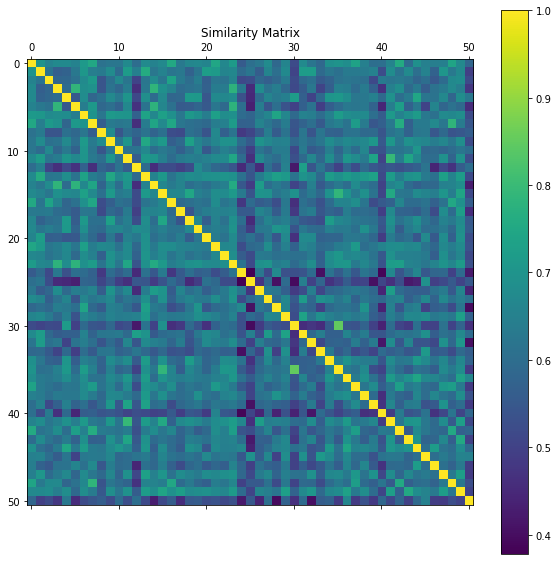

In [ ]:
# Open the similarity matrix A
with open('distance_matrix_lastm.npy', 'rb') as f:
    A = np.load(f)
print(A)
plt.figure(figsize=(10,10))
plt.matshow(A[:,:], fignum=0)
plt.colorbar()
plt.title('Similarity Matrix')
#plt.savefig('similarity_matrix.png')
plt.show()

In [ ]:
# Compute the edges
edges=[]
for i in range(len(A[0])):
    for j in range(i+1,len(A[0])):
        edges.append([i,j,round(A[i,j]*1000)/1000])
        
edges=pd.DataFrame(edges)
edges.columns=['Source','Target','Weight']
source=np.array(edges['Source'])
target=np.array(edges['Target'])
weight=np.array(edges['Weight'])
print('All edges: \n',edges)

nodes= np.arange(0,target[-1]+1,1,dtype=int)
print('Nodes: \n',nodes)

# to save all the edges
# edges.to_csv(r'edges_tot.csv',index=False)

# to read pre-existing edges
#edges=pd.read_csv("edges_lastm.csv", header=0)

All edges: 
       Source  Target  Weight
0          0       1   0.697
1          0       2   0.655
2          0       3   0.672
3          0       4   0.674
4          0       5   0.655
...      ...     ...     ...
1270      47      49   0.724
1271      47      50   0.486
1272      48      49   0.625
1273      48      50   0.527
1274      49      50   0.502

[1275 rows x 3 columns]
Nodes: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


## Method 1 for edge-selection

In [ ]:
# first set of edges with a fixed threshold equal to 0.5
edges1=edges[edges['Weight']>0.5]
print('Edges with method 1: \n', edges1)
# to save edges1
#edges1.to_csv(r'edges_method1.csv',index=False)
source1=np.array(edges1['Source'])
target1=np.array(edges1['Target'])
weight1=np.array(edges1['Weight'])

In [ ]:
# Create a nx graph
G = nx.Graph()
G.add_nodes_from(nodes)
for i in range(len(edges1)):
    G.add_edge(source1[i], target1[i], weight=weight1[i])
nx.draw(G)
plt.title('Network 1')
#plt.savefig('net-pre1.png')
plt.show()

In [ ]:
degrees = np.array([len(list(G.neighbors(n))) for n in G.nodes()])
print('Simple degrees: \n',degrees)

In [ ]:
degrees_weig=np.array([n[1] for n in G.degree(weight='weight')])
print('Weighted degrees: \n',degrees_weig)

In [ ]:
neigh_deg=np.array([n[1] for n in nx.average_neighbor_degree(G).items()])
print('Simple degrees of the neighbors: \n',neigh_deg)

In [ ]:
neigh_deg_weig=np.array([n[1] for n in nx.average_neighbor_degree(G, weight="weight").items()])
print('Weighted degrees of the neighbors: \n',neigh_deg_weig)

In [ ]:
plt.figure()
plt.scatter((degrees), (degrees_weig))
plt.xlabel('degree')
#plt.xscale('log')                                                                                                                                                                                                                         
#plt.yscale('log')
plt.ylabel('weighted degree')
plt.title('Degree versus Weighted degree')
#plt.savefig('degr_vs_weig1.png')
plt.show()

In [ ]:
#d=degrees_weig
d=degrees

pk,bins=np.histogram(d,bins=25,range= (d.min(), d.max()))
bins=(bins[1:] + bins[:-1])/2

plt.bar(bins,pk,width=1.3,color='purple')
plt.title("Degree Distribution")
plt.xlabel('k')
plt.ylabel('pk')
#plt.savefig('degree_dist1.png')
plt.show()

pk=pk/np.sum(pk)
plt.loglog(bins,pk/np.sum(pk),'o',color='purple')
plt.title("Degree Distribution Log-Log Plot")
#plt.savefig('loglog1.png')
plt.xlabel('k')
plt.ylabel('pk')
plt.show()

In [ ]:
degrees1=degrees[degrees>0]
neigh_deg1=neigh_deg[degrees>0]

import random

x = np.linspace(1,100,10)
y = np.log10(x) + np.log10(np.random.uniform(0,10))

coefficients = np.polyfit(np.log10(degrees1), np.log10(neigh_deg1), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(degrees1))

plt.plot(degrees1, neigh_deg1, 'o', color='crimson')
plt.plot(degrees1, 10**log10_y_fit, '-', color='darkblue', linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.title('DISASSORTATIVE')
#plt.savefig('k_nn1.png')
print('Slope (mu) and Intercept: ',polynomial)

In [ ]:
betw_centr = np.array([n[1] for n in nx.betweenness_centrality(G, weight='weight').items()])
plt.figure()
plt.scatter((degrees), (betw_centr))
plt.xlabel('k')
plt.xscale('log')                                                                                                                                                                                                                         
plt.yscale('log')
plt.ylabel('betweenness centrality')
plt.title('Betweenness versus degree')
#plt.savefig('degree_vs_betw1.png')
plt.show()

In [ ]:
close_cent=np.array([n[1] for n in nx.closeness_centrality(G).items()])
plt.figure()
plt.scatter((degrees), (close_cent))
plt.xlabel('k')
#plt.xscale('log')                                                                                                                                                                                                                         
#plt.yscale('log')
plt.ylabel('closeness centrality')
plt.title('Degree versus Closeness')
#plt.savefig('degree_vs_clos1.png')
plt.show()

In [ ]:
close_cent=np.array([n[1] for n in nx.closeness_centrality(G).items()])
plt.figure()
plt.scatter((betw_centr), (close_cent))
plt.xlabel('betweenness centrality')
plt.xscale('log')                                                                                                                                                                                                                         
plt.yscale('log')
plt.ylabel('closeness centrality')
plt.title('Betweenness versus Closeness')
#plt.savefig('betw_vs_clos1.png')
plt.show()

## Method 2 for edge-selection

In [ ]:
# Compute the thresholds for each node in the network
x=[]
alpha=0.9
for i in range(A.shape[0]):
    mu=(A.sum(1)[i]-1)/(len(A[i,:][[A[i,:]>0]])-1)
    for j in range(A.shape[1]):
        sd=0
        if(i!=j):
            sd+=(A[i,j]-mu)**2
        sd=sd/(A.shape[1]-1)
        sd=np.sqrt(sd)
    xx=mu+alpha*sd
    x.append(xx)
x=np.array(x)
print('Thresholds for each node: \n',x)
print('\nAvarage of thresholds: ',np.mean(x))
print('\nStandard deviation of thresholds: ',np.std(x))

Thresholds for each node: 
 [0.66651071 0.65426713 0.61741574 0.63185458 0.62861573 0.61769324
 0.68207323 0.64586913 0.58694457 0.66411077 0.60816105 0.65898489
 0.55620669 0.68661317 0.6488793  0.67461671 0.61760904 0.616428
 0.63103607 0.63791209 0.61602633 0.65877489 0.64930397 0.6831449
 0.57765809 0.52177028 0.6210845  0.63055879 0.61931069 0.64336686
 0.54780517 0.61632153 0.61970969 0.56966345 0.63520721 0.63949902
 0.64862145 0.64553367 0.63564465 0.60568225 0.53591009 0.66614046
 0.62876318 0.62841172 0.64241068 0.62048741 0.59934911 0.65525325
 0.6211432  0.67390248 0.52845419]

Avarage of thresholds:  0.6258179413835907

Standard deviation of thresholds:  0.03845257926658482


C:\Users\MADDAL~1\AppData\Local\Temp/ipykernel_19724/2674268895.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mu=(A.sum(1)[i]-1)/(len(A[i,:][[A[i,:]>0]])-1)


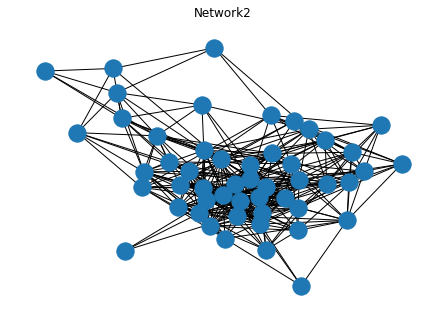

In [ ]:
G = nx.Graph()
G.add_nodes_from(nodes)
edges2=[]

# Retain all edges (v,w) exeeding the threshold of both node v and w
for i in range(len(edges)):
    if (weight[i]>x[source[i]]) and (weight[i]>x[target[i]]):
        G.add_edge(source[i], target[i], weight=weight[i])
        edges2.append([source[i], target[i], weight[i]])
        
edges2=pd.DataFrame(edges2)
edges2.columns=['Source','Target','Weight']
# to save edges2
edges2.to_csv(r'edges2.csv',index=False)

nx.draw(G)
#plt.savefig('network2.png')
plt.title('Network2')
plt.show()

In [ ]:
degrees = np.array([len(list(G.neighbors(n))) for n in G.nodes()])
print('Simple degrees: \n',degrees)

Simple degrees: 
 [19 16 10 13 21  8 22 15  7 21 11 22  7 24 14 19 12 11 15 15 10 19 18 21
  4  4 13 19 12 18  3 16 11  8 21 16 24 14 15 10  4 22 16 18 24 10  5 19
  8 25  5]


In [ ]:
degrees_weig=np.array([n[1] for n in G.degree(weight='weight')])
print('Weighted degrees: \n',degrees_weig)

Weighted degrees: 
 [13.409 11.172  6.689  9.072 14.258  5.753 15.523 10.665  4.496 14.558
  7.187 15.401  4.524 17.108  9.845 13.488  8.368  7.204 10.296 10.16
  6.746 13.039 12.165 15.025  2.626  2.468  8.732 12.765  8.011 12.137
  2.259 10.768  7.37   5.155 14.189 11.165 16.416  9.723 10.078  6.758
  2.443 15.468 11.044 12.176 16.482  6.742  3.376 13.09   5.752 17.526
  3.054]


In [ ]:
neigh_deg=np.array([n[1] for n in nx.average_neighbor_degree(G).items()])
print('Simple degrees of the neighbors: \n',neigh_deg)

Simple degrees of the neighbors: 
 [17.57894737 18.9375     13.1        15.         17.66666667 14.875
 18.22727273 13.93333333 15.57142857 18.57142857 16.45454545 18.36363636
 11.85714286 18.375      14.85714286 18.63157895 16.75       16.09090909
 20.4        17.53333333 15.7        18.57894737 19.         18.04761905
 17.75        9.75       14.84615385 17.10526316 16.5        16.66666667
 18.66666667 13.875      16.36363636 10.625      17.9047619  17.625
 17.83333333 17.21428571 17.93333333 19.5         9.75       18.31818182
 14.4375     18.66666667 17.16666667 13.2        17.2        17.73684211
 14.125      17.56        9.8       ]


In [ ]:
neigh_deg_weig=np.array([n[1] for n in nx.average_neighbor_degree(G, weight="weight").items()])
print('Weighted degrees of the neighbors: \n',neigh_deg_weig)

Weighted degrees of the neighbors: 
 [17.49854575 18.91666667 13.15802063 15.00055115 17.70823397 14.97775074
 18.23152741 13.9161744  15.6863879  18.5846957  16.56657854 18.4068567
 12.05946065 18.38251111 14.86399187 18.66058719 16.64400096 16.22973348
 20.4288073  17.56811024 15.83234509 18.58892553 19.04258118 17.97178037
 17.81188119  9.98743922 15.04466331 17.14633764 16.59755336 16.70173849
 18.50863214 13.99127043 16.4770692  10.93792435 18.00754105 17.48231079
 17.96972466 17.16003291 17.96408017 19.58937555  9.86614818 18.42759245
 14.49674031 18.85578187 17.24347773 13.21343815 17.32523697 17.76264324
 14.19801808 17.59505877 10.22265881]


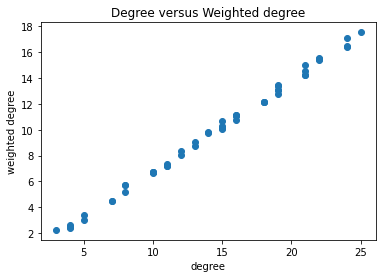

In [ ]:
plt.figure()
plt.scatter((degrees), (degrees_weig))
plt.xlabel('degree')
#plt.xscale('log')                                                                                                                                                                                                                         
#plt.yscale('log')
plt.ylabel('weighted degree')
plt.title('Degree versus Weighted degree')
#plt.savefig('degr_vs_weig2.png')
plt.show()

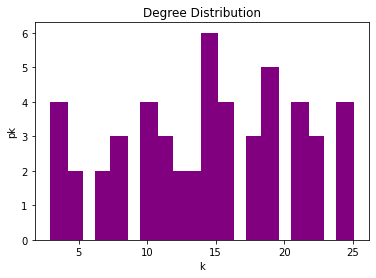

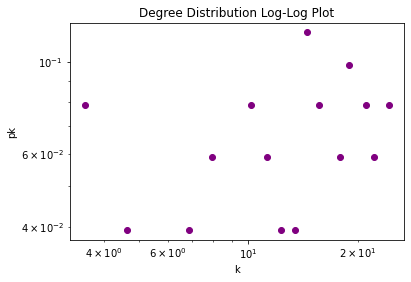

In [ ]:
#d=degrees_weig
d=degrees

pk,bins=np.histogram(d,bins=20,range= (d.min(), d.max()))
bins=(bins[1:] + bins[:-1])/2

plt.bar(bins,pk,width=1.3,color='purple')
plt.title("Degree Distribution")
plt.xlabel('k')
plt.ylabel('pk')
#plt.savefig('degree_dist2.png')
plt.show()

pk=pk/np.sum(pk)
plt.loglog(bins,pk/np.sum(pk),'o',color='purple')
plt.title("Degree Distribution Log-Log Plot")
#plt.savefig('loglog2.png')
plt.xlabel('k')
plt.ylabel('pk')
plt.show()

In [ ]:
degrees1=degrees[degrees>0]
neigh_deg1=neigh_deg[degrees>0]

import random

x = np.linspace(1,100,10)
y = np.log10(x) + np.log10(np.random.uniform(0,10))

coefficients = np.polyfit(np.log10(degrees1), np.log10(neigh_deg1), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(degrees1))  # <-- Changed

plt.plot(degrees1, neigh_deg1, 'o', color='crimson')
plt.plot(degrees1, 10**log10_y_fit, '-', color='darkblue', linewidth=2)     # <-- Changed
plt.yscale('log')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('knn(k)')
plt.legend()
plt.title('ASSORTATIVE')
#plt.savefig('k_nn2.png')
print('Slope (mu) and Intecept',polynomial)

In [ ]:
betw_centr = np.array([n[1] for n in nx.betweenness_centrality(G, weight='weight').items()])
plt.figure()
plt.scatter((degrees), (betw_centr))
plt.xlabel('k')
plt.xscale('log')                                                                                                                                                                                                                         
plt.yscale('log')
plt.ylabel('betweenness centrality')
plt.title('Betweenness versus degree')
#plt.savefig('degree_vs_betw2.png')
plt.show()

In [ ]:
close_cent=np.array([n[1] for n in nx.closeness_centrality(G).items()])
plt.figure()
plt.scatter((degrees), (close_cent))
plt.xlabel('k')
#plt.xscale('log')                                                                                                                                                                                                                         
#plt.yscale('log')
plt.ylabel('closeness centrality')
plt.title('Degree versus Closeness')
#plt.savefig('degree_vs_clos2.png')
plt.show()

In [ ]:
close_cent=np.array([n[1] for n in nx.closeness_centrality(G).items()])
plt.figure()
plt.scatter((betw_centr), (close_cent))
plt.xlabel('betweenness centrality')
plt.xscale('log')                                                                                                                                                                                                                         
plt.yscale('log')
plt.ylabel('closeness centrality')
plt.title('Betweenness versus Closeness')
#plt.savefig('betw_vs_clos2.png')
plt.show()